LANGKAH DASAR PEMBUATAN CHART MENGGUNAKAN MATPLOTLIB
1. Mempersiapkan dulu data yang dibutuhkan (NumPy & Pandas)
2. Membuat plot dari data yang telah dipersiapkan
3. mengkustomisasi berbagai komponen di chart yang telah dibuat - seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya.
4. Menyimpan gambar yang telah dibuat

CONTOH KASUS : MEMBUAT GRAFIK GMV BULANAN UNTUK TAHUN 2019
1. GMV (Gross Merchandise Value) artinya Total uang yang dibayarkan customer

MEMPERSIAPKAN DATASET
1. Pengenalan Dataset: https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
2. Mengetahui penjelasan setiap kolom dataset
3. Menambahkan kolom yang diperlukan - kolom GMV & order_month

In [4]:
# Pengenalan Dataset
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

print('Ukuran dataset: %d baris dan %d kolom/n' % dataset.shape)
print(dataset.columns)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom/n
Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price'],
      dtype='object')
Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


Mengetahui penjelasan setiap kolom dataset :
1. order_id: ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
2. order_date: tanggal terjadinya transaksi
3. customer_id: ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
3. city: kota tempat toko terjadinya transaksi
4. province: provinsi (berdasarkan city)
5. product_id: ID dari suatu product yang dibeli
6. brand: brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
7. quantity: Kuantitas/banyaknya product yang dibeli
8. item_price: Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli.

Menambahkan kolom yang diperlukan :
1. Berdasarkan kasus : Membuat Grafik GMV Bulanan , maka dapat dibayangkan sebuah line chart dengan sumbu-x berupa bulan, dan sumbu-y adalah total GMV di bulan tersebut
2. Dataset tidak memiliki kolom order_month dan GMV, maka kita akan membuatnya

Membuat dataset menggunakan : (datetime, apply, lamda) & Cara Langsung - pada kolom GMV

1. apply & lambda : biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja.
2. Function datetime.datetime.strptime : digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
3. Function strftime : digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada.
4. Cara langsung : dapat digunakan ketika membuat kolom yang hanya merupakan hasil dari perhitungan matematis sederhana atau hanya menggunakan operator saja sudah bisa.

In [7]:
# Menambahkan kolom yang diperlukan
# Menambahkan kolom order_month
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Membuat kolom order_month dari data order_date
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

# Membuat kolom GMV dari perkalian item_price dan quantity
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

print('Ukuran dataset: %d baris dan %d kolom/n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom/n
Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


MEMBUAT PLOT DARI DATA YANG TELAH DISIAPKAN
1. Membuat Data Agregat : Groupby
2. Cara Standar membuat line chart : plt.plot()
3. Cara alternatif membuat line chart : .plot()

In [1]:
# Membuat Data Agregate 
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Membuat kolom order_month dari data order_date
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

# Membuat kolom GMV dari perkalian item_price dan quantity
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Membuat data agregate order_month & GMV
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


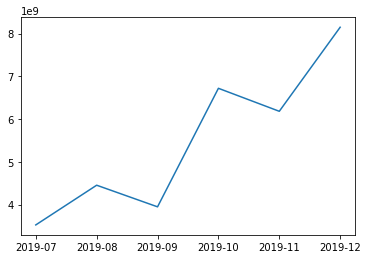

In [3]:
# Cara Standar membuat line chart : plt.plot()
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Membuat kolom order_month dari data order_date
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

# Membuat kolom GMV dari perkalian item_price dan quantity
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Membuat data agregate order_month & GMV
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

# Membuat plot line chart
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

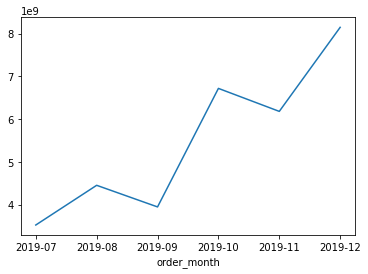

In [4]:
# Cara Alternatif membuat line chart : .plot()
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Membuat kolom order_month dari data order_date
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

# Membuat kolom GMV dari perkalian item_price dan quantity
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Membuat data agregate order_month & GMV
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

# Membuat plot line chart
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

KUSTOMISASI GRAFIK (Step Awal): 
1. Anatomi Figure
2. Menampilkan Plot
3. Mengubah figure size 
4. Menambahkan Title dan Axis labels
5. Memodifikasi Title dan Axis labels
6. Memodifikasi Plot Line and Point
7. Menambahkan Grid

Anatomi dari Figure:
1. Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
2. Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
3. Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
4. Axis Label: Nama dari sumbu yang ditampilkan.
5. Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
6. Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
7. Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot/histogram).
8. Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.
9. Memahami Komponen diatas sudah cukup untuk melakukan berbagai visualisasi. tapi, komponen lengkapnya bisa diakses di https://matplotlib.org/stable/gallery/showcase/anatomy.html

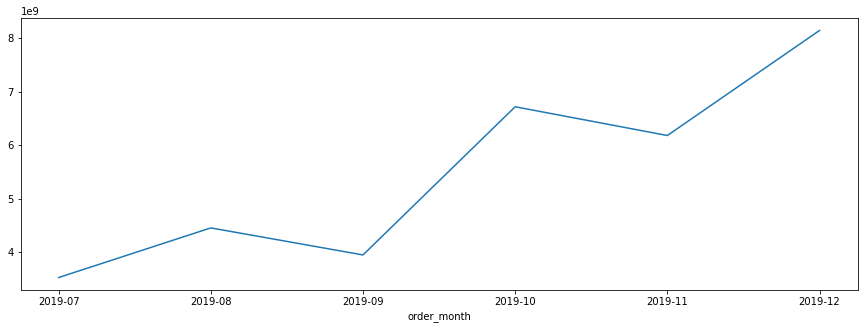

In [1]:
# KUSTOMISASI GRAFIK - Part 1
# Kustomisasi - MENGUBAH FIGURE SIZE
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan Plot : Cara alternatif
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()


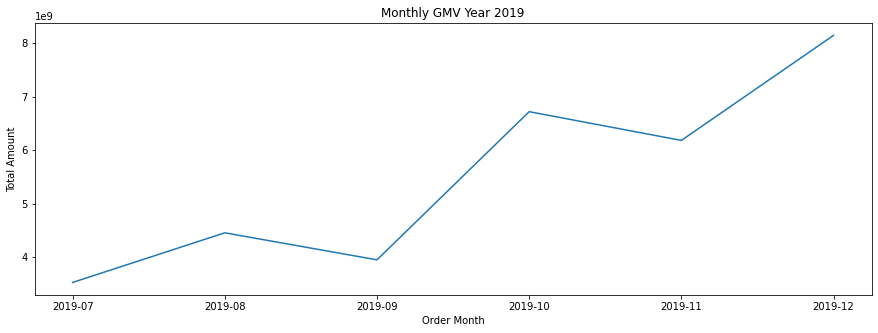

In [2]:
# Kustomisasi - MENAMBAHKAN TITLE DAN AXIS LABELS
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan Plot : Cara alternatif
dataset.groupby(['order_month'])['gmv'].sum().plot()
# Menambahkan Title dan Axis labels
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total Amount')
plt.show()

MODIFIKASI TITLE DAN AXIS LABELS
1. Title
2. loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka default-nya title ada di tengah.
3. pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
4. fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
5. color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.
6. Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.

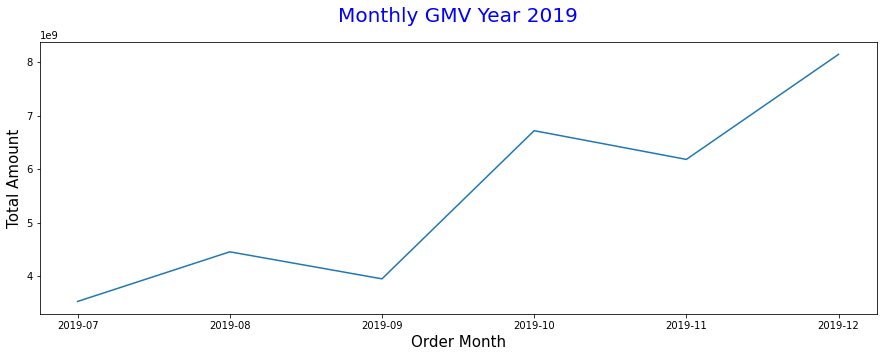

In [3]:
# Kustomisasi - MODIFIKASI TITLE DAN AXIS LABELS
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan Plot : Cara alternatif
dataset.groupby(['order_month'])['gmv'].sum().plot()
# Menambahkan & Memodifikasi Title dan Axis labels
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

MODIFIKASI LINE AND POINT
1. color: mengubah warnanya (sama seperti di title)
2. linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
3. linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
3. marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

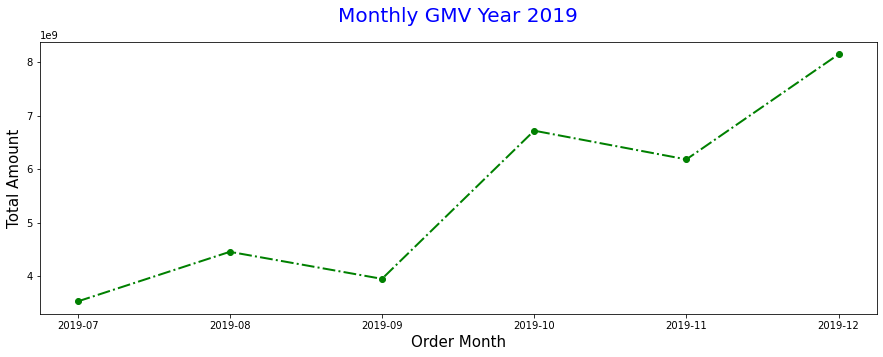

In [6]:
# Kustomisasi - LINE AND POINT
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan & Memodifikasi Line and Point
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
# Menambahkan & Memodifikasi Title dan Axis labels
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

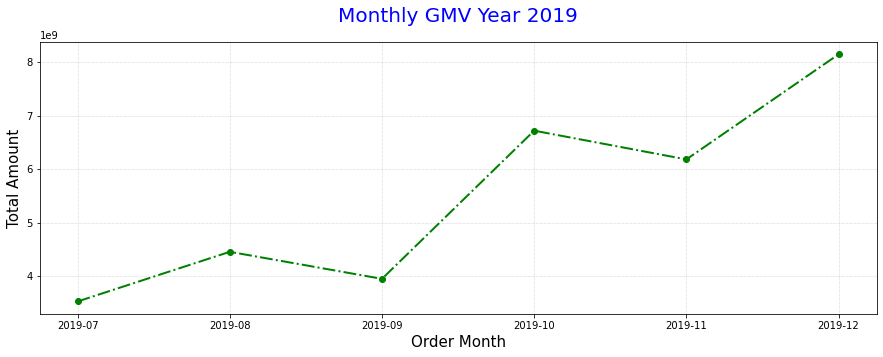

In [8]:
# Kustomisasi - GRID
# Parameter grid sama dengan line and point
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan & Memodifikasi Line and Point
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
# Menambahkan & Memodifikasi Title dan Axis labels
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
# Menambahkan Grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

KUSTOMISASI GRAFIK (Step Akhir):
1. Kustomisasi Axis Ticks - list tiks labels di sumbu y
2. Menentukan Batas Minimum dan Maksimum Axis Ticks
3. Menambahkan Informasi Pada Plot

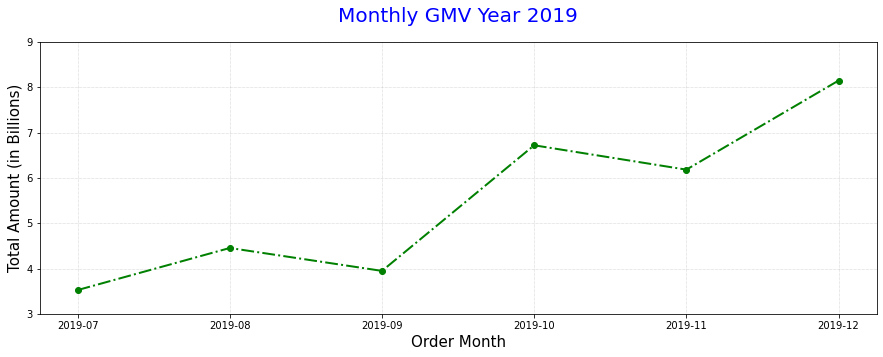

In [10]:
# Kustomisasi Axis Ticks - list tiks labels di sumbu y
# Buat dalam bentuk miliar agar lebih mudah dipahami
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan & Memodifikasi Line and Point
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
# Menambahkan & Memodifikasi Title dan Axis labels
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
# Menambahkan Grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# Modifikasi list tiks labels di sumbu y
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

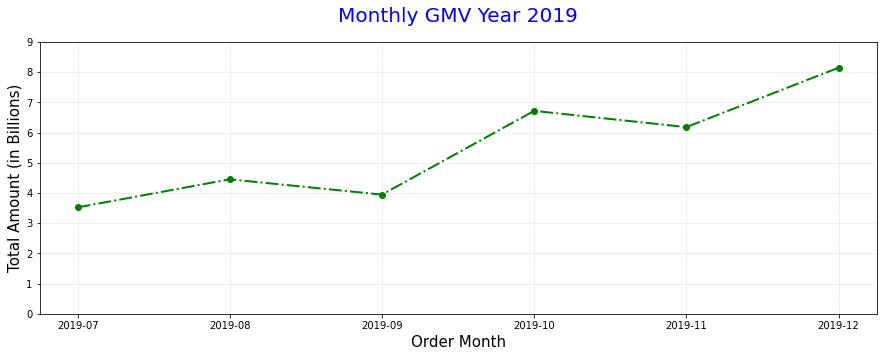

In [11]:
# Menentukan Batas Minimum dan Maksimum Axis Ticks
# Sebaiknya diset agar sumbu-y nya dimulai dari 0
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
plt.figure(figsize=(15,5))
# Menampilkan & Memodifikasi Line and Point
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
# Menambahkan & Memodifikasi Title dan Axis labels
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
# Menambahkan Grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# Batas Minimum : sumbu-y nya dimulai dari 0
plt.ylim(ymin=0)
# Modifikasi list tiks labels di sumbu y
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

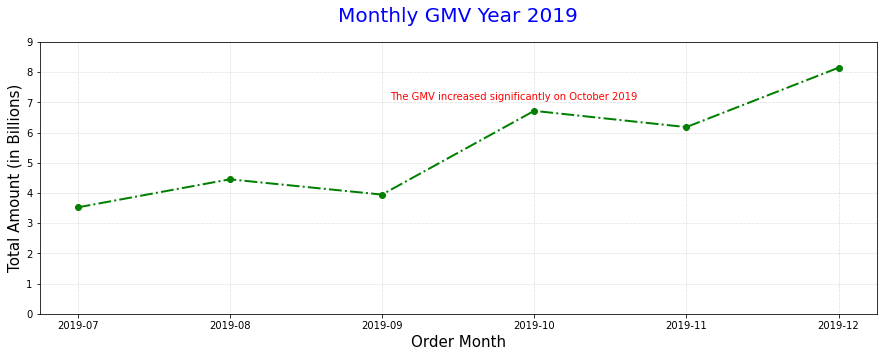

In [13]:
# Menambahkan Informasi Pada Plot : untuk mendapat insight
# 1. Memberikan nama variabel fig untuk figure size 
# 2. Saat set transform=fig.transFigure, maka koordinatnya 
# berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Mengubah figure size
fig = plt.figure(figsize=(15,5))
# Menampilkan & Memodifikasi Line and Point
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
# Menambahkan & Memodifikasi Title dan Axis labels
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
# Menambahkan Grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# Batas Minimum : sumbu-y nya dimulai dari 0
plt.ylim(ymin=0)
# Modifikasi list tiks labels di sumbu y
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
# Menambahkan Informasi Pada Plot 
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

MENYIMPAN HASIL PLOT MENJADI IMAGE DILANJUTKAN DI TUGAS PRAKTEK